# CPD using TIRE

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Lambda, Input, Dense
from tensorflow.keras.models import Model

import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, peak_prominences
import warnings
import time, copy

import utils
import TIRE
import simulate

## Set parameters

In [13]:
window_size = 20
domain = "TD" #choose from: TD (time domain), FD (frequency domain) or both

#parameters TD
intermediate_dim_TD=0
latent_dim_TD=1 #h^TD in paper
nr_shared_TD=1 #s^TD in paper
K_TD = 2 #as in paper
nr_ae_TD= K_TD+1 #number of parallel AEs = K+1
loss_weight_TD=1 #lambda_TD in paper

#parameters FD
intermediate_dim_FD=10
latent_dim_FD=1 #h^FD in paper
nr_shared_FD=1 #s^FD in paper
K_FD = 2 #as in paper
nr_ae_FD=K_FD+1 #number of parallel AEs = K+1
loss_weight_FD=1 #lambda^FD in paper
nfft = 30 #number of points for DFT
norm_mode = "timeseries" #for calculation of DFT, should the timeseries have mean zero or each window?

## Generate data

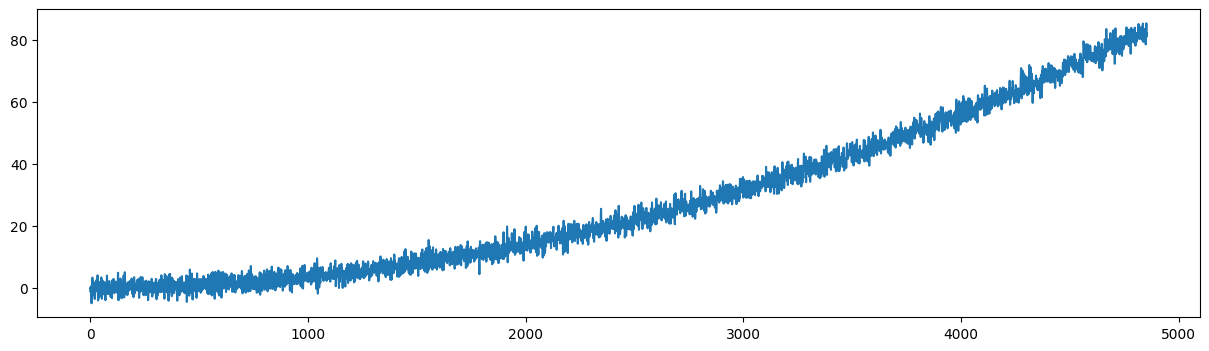

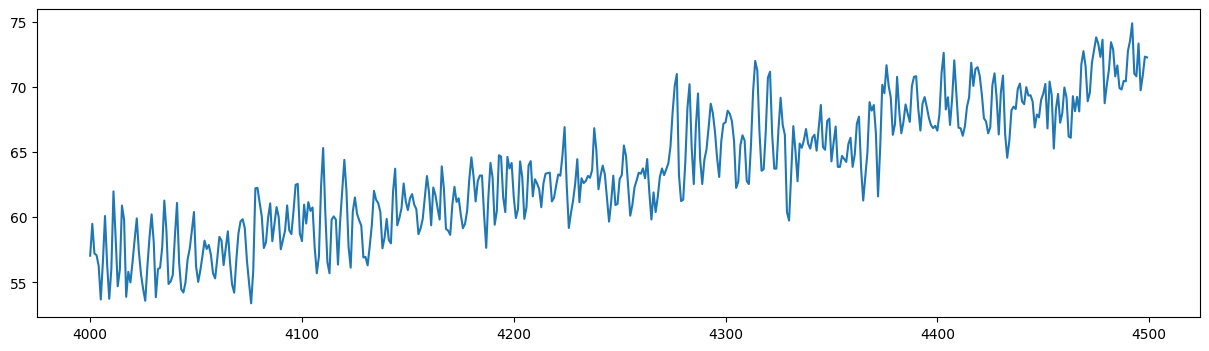

In [14]:
timeseries, windows_TD, parameters = simulate.generate_jumpingmean(window_size)
windows_FD = utils.calc_fft(windows_TD, nfft, norm_mode)

plt.figure(figsize=(15,4))
plt.plot(timeseries)
plt.show()
plt.figure(figsize=(15,4))
plt.plot(range(4000,4500),timeseries[4000:4500])
plt.show()

## Train the autoencoders

In [15]:
shared_features_TD = TIRE.train_AE(windows_TD, intermediate_dim_TD, latent_dim_TD, nr_shared_TD, nr_ae_TD, loss_weight_TD)
shared_features_FD = TIRE.train_AE(windows_FD, intermediate_dim_FD, latent_dim_FD, nr_shared_FD, nr_ae_FD, loss_weight_FD)

Model: "model_66"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_45 (InputLayer)       [(None, 3, 20)]              0         []                            
                                                                                                  
 dense_88 (Dense)            (None, 3, 1)                 21        ['input_45[0][0]']            
                                                                                                  
 dense_89 (Dense)            (None, 3, 0)                 0         ['input_45[0][0]']            
                                                                                                  
 tf.concat_22 (TFOpLambda)   (None, 3, 1)                 0         ['dense_88[0][0]',            
                                                                     'dense_89[0][0]']     

## Postprocessing and peak detection

In [16]:
#we calculate the smoothened dissimilarity measure and the corresponding prominence-based change point scores
dissimilarities = TIRE.smoothened_dissimilarity_measures(shared_features_TD, shared_features_FD, domain, window_size)
change_point_scores = TIRE.change_point_score(dissimilarities, window_size)

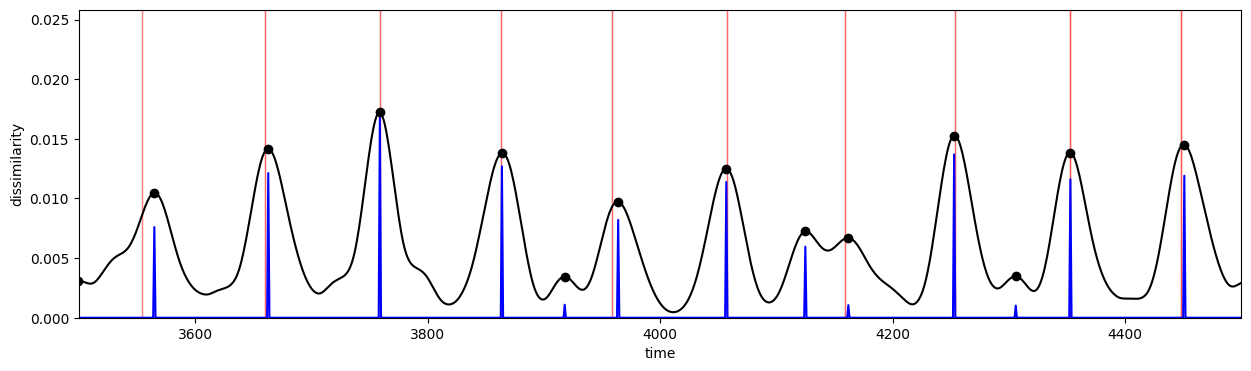

[0.6761458677824447, 0.8653820315680616, 0.9151086892739666]


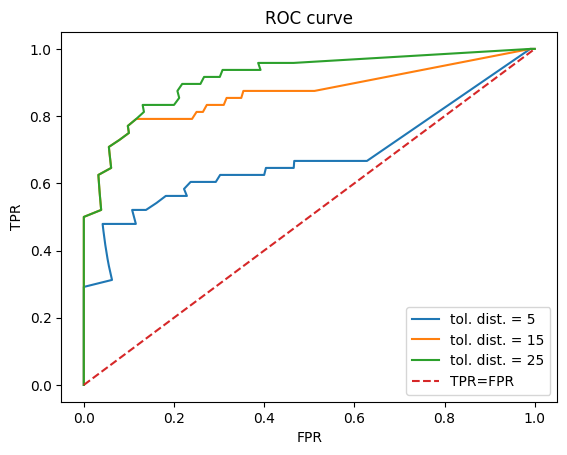

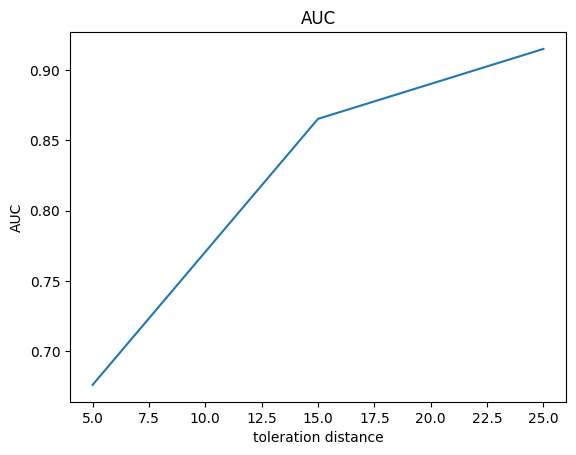

In [17]:
#parameters for plot
time_start = 3500
time_stop = 4500
plot_prominences = True

utils.plot_cp(dissimilarities, parameters, window_size, time_start, time_stop, plot_prominences)

#parameters for AUC calculation
tol_distances = [5,15,25]
auc = utils.get_auc(dissimilarities,tol_distances, parameters, window_size)

Model: "model_72"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_49 (InputLayer)       [(None, 3, 20)]              0         []                            
                                                                                                  
 dense_96 (Dense)            (None, 3, 1)                 21        ['input_49[0][0]']            
                                                                                                  
 dense_97 (Dense)            (None, 3, 0)                 0         ['input_49[0][0]']            
                                                                                                  
 tf.concat_24 (TFOpLambda)   (None, 3, 1)                 0         ['dense_96[0][0]',            
                                                                     'dense_97[0][0]']     

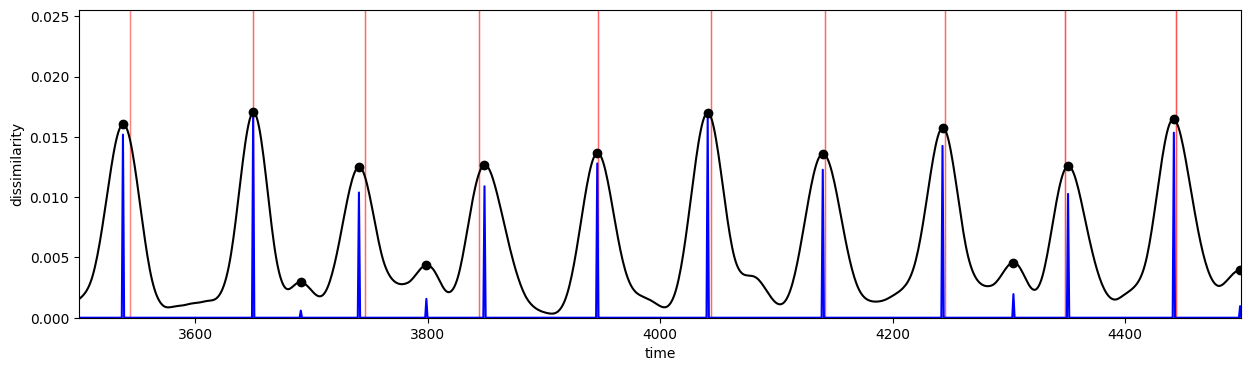

[0.6293504599550492, 0.8287924911382956, 0.9130549666972454]


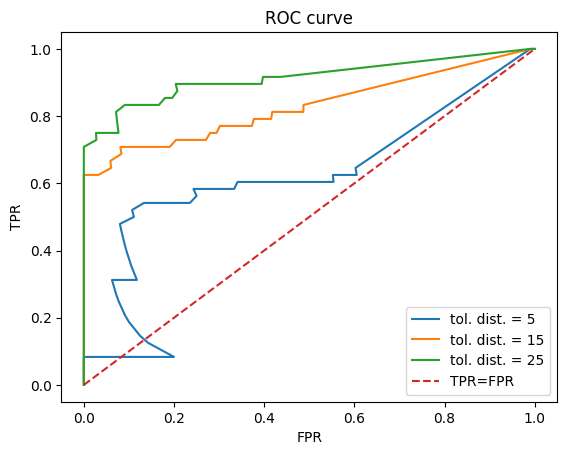

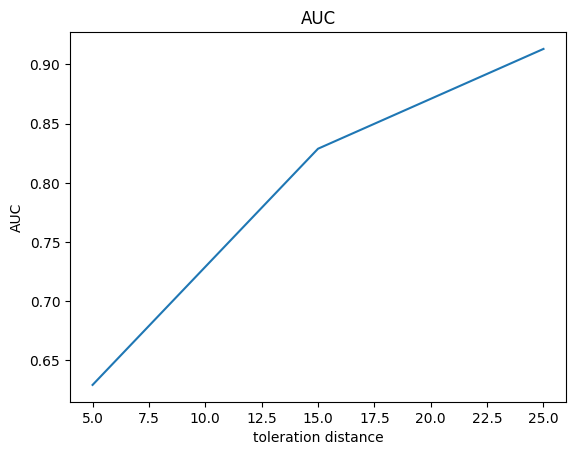

Model: "model_78"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_53 (InputLayer)       [(None, 3, 20)]              0         []                            
                                                                                                  
 dense_104 (Dense)           (None, 3, 1)                 21        ['input_53[0][0]']            
                                                                                                  
 dense_105 (Dense)           (None, 3, 0)                 0         ['input_53[0][0]']            
                                                                                                  
 tf.concat_26 (TFOpLambda)   (None, 3, 1)                 0         ['dense_104[0][0]',           
                                                                     'dense_105[0][0]']    

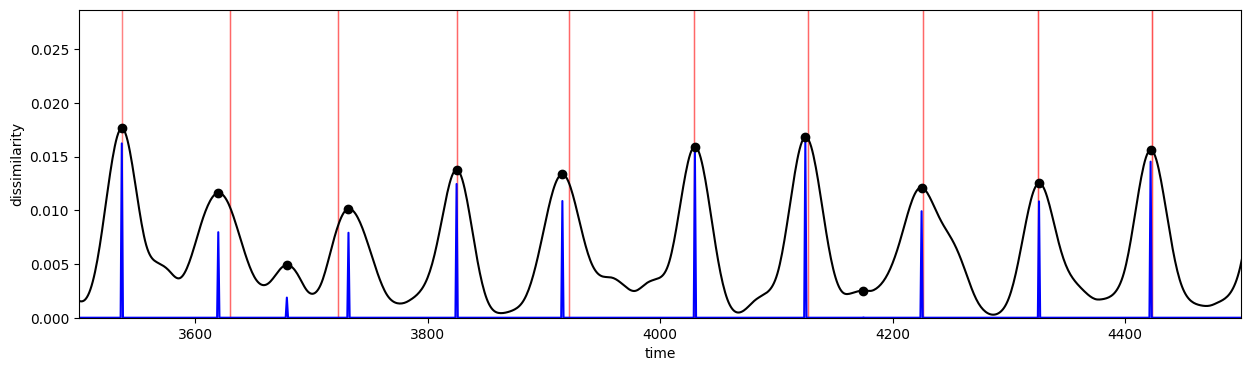

[0.5952970698747279, 0.8953873682005014, 0.9600824224897393]


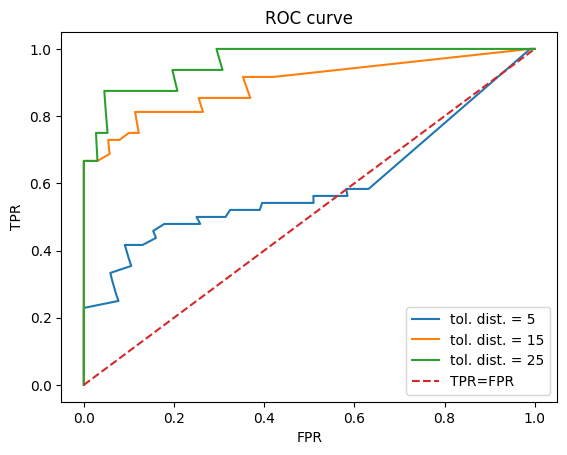

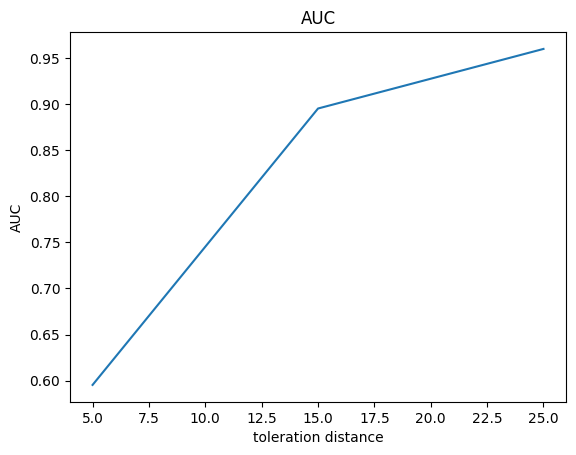

Model: "model_84"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_57 (InputLayer)       [(None, 3, 20)]              0         []                            
                                                                                                  
 dense_112 (Dense)           (None, 3, 1)                 21        ['input_57[0][0]']            
                                                                                                  
 dense_113 (Dense)           (None, 3, 0)                 0         ['input_57[0][0]']            
                                                                                                  
 tf.concat_28 (TFOpLambda)   (None, 3, 1)                 0         ['dense_112[0][0]',           
                                                                     'dense_113[0][0]']    

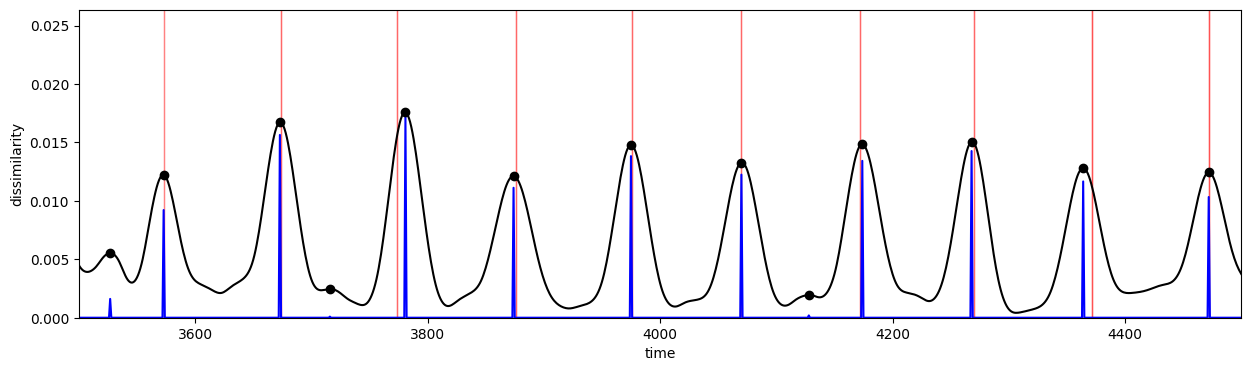

[0.6008414970035388, 0.9081167876963689, 0.9563547743394447]


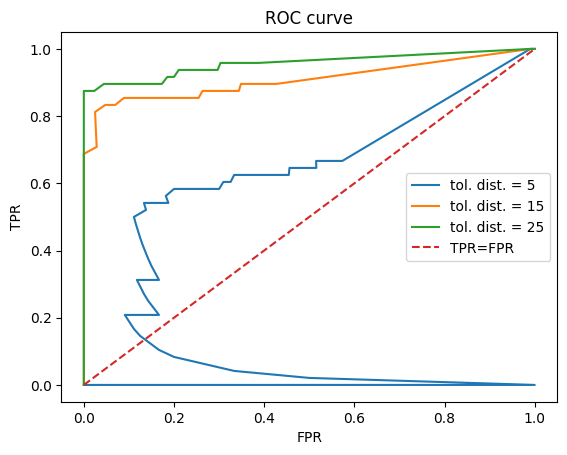

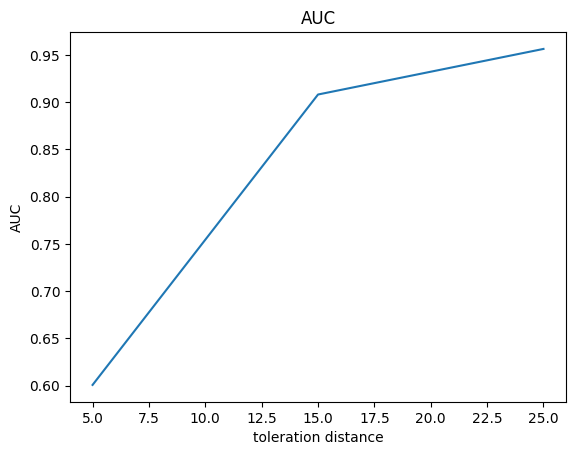

Model: "model_90"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_61 (InputLayer)       [(None, 3, 20)]              0         []                            
                                                                                                  
 dense_120 (Dense)           (None, 3, 1)                 21        ['input_61[0][0]']            
                                                                                                  
 dense_121 (Dense)           (None, 3, 0)                 0         ['input_61[0][0]']            
                                                                                                  
 tf.concat_30 (TFOpLambda)   (None, 3, 1)                 0         ['dense_120[0][0]',           
                                                                     'dense_121[0][0]']    

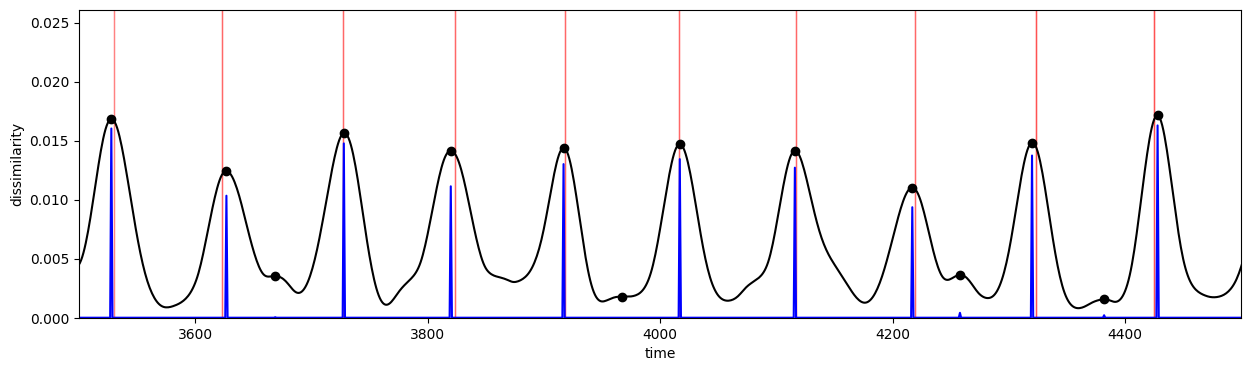

[0.7404939243569884, 0.9137690548052634, 0.9597043410192135]


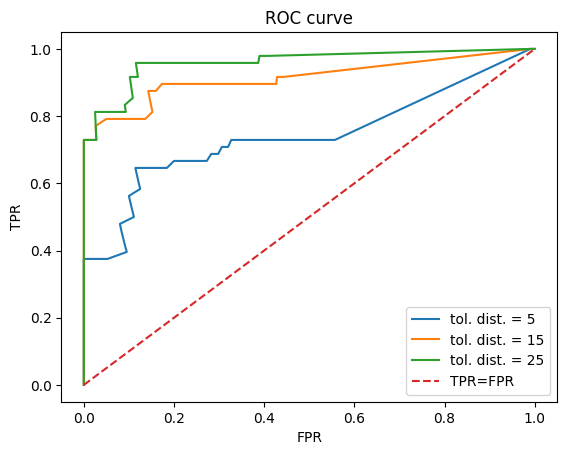

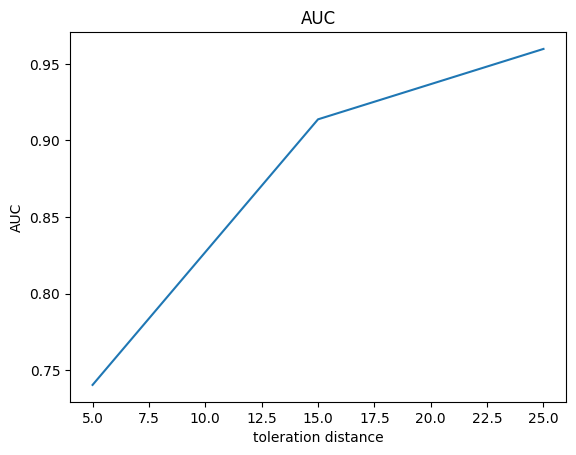

Model: "model_96"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_65 (InputLayer)       [(None, 3, 20)]              0         []                            
                                                                                                  
 dense_128 (Dense)           (None, 3, 1)                 21        ['input_65[0][0]']            
                                                                                                  
 dense_129 (Dense)           (None, 3, 0)                 0         ['input_65[0][0]']            
                                                                                                  
 tf.concat_32 (TFOpLambda)   (None, 3, 1)                 0         ['dense_128[0][0]',           
                                                                     'dense_129[0][0]']    

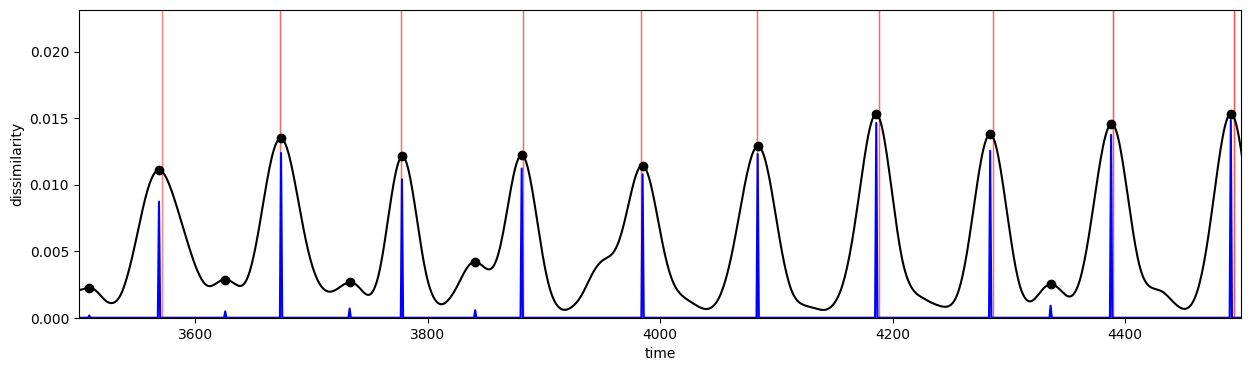

[0.7667655739970085, 0.9123894610331914, 0.945340325320167]


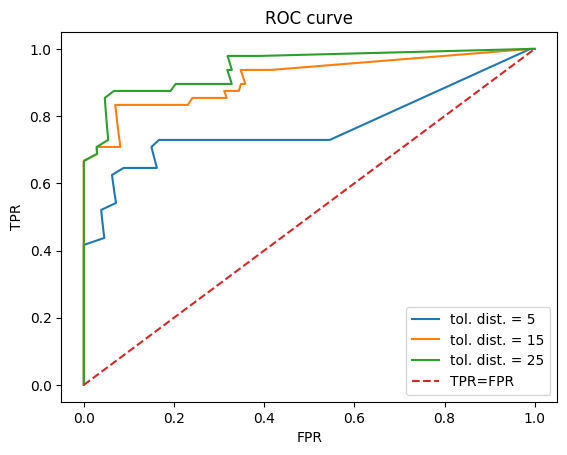

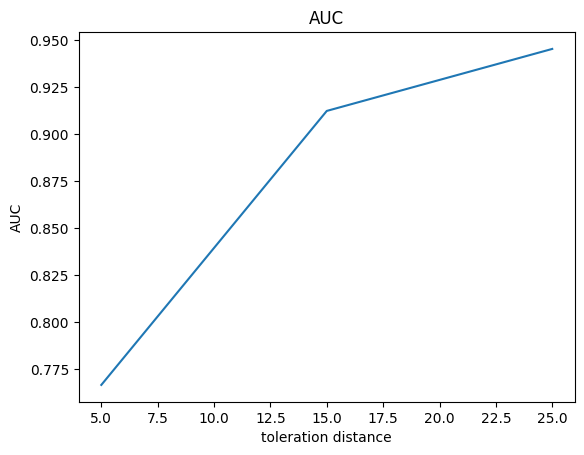

Model: "model_102"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_69 (InputLayer)       [(None, 3, 20)]              0         []                            
                                                                                                  
 dense_136 (Dense)           (None, 3, 1)                 21        ['input_69[0][0]']            
                                                                                                  
 dense_137 (Dense)           (None, 3, 0)                 0         ['input_69[0][0]']            
                                                                                                  
 tf.concat_34 (TFOpLambda)   (None, 3, 1)                 0         ['dense_136[0][0]',           
                                                                     'dense_137[0][0]']   

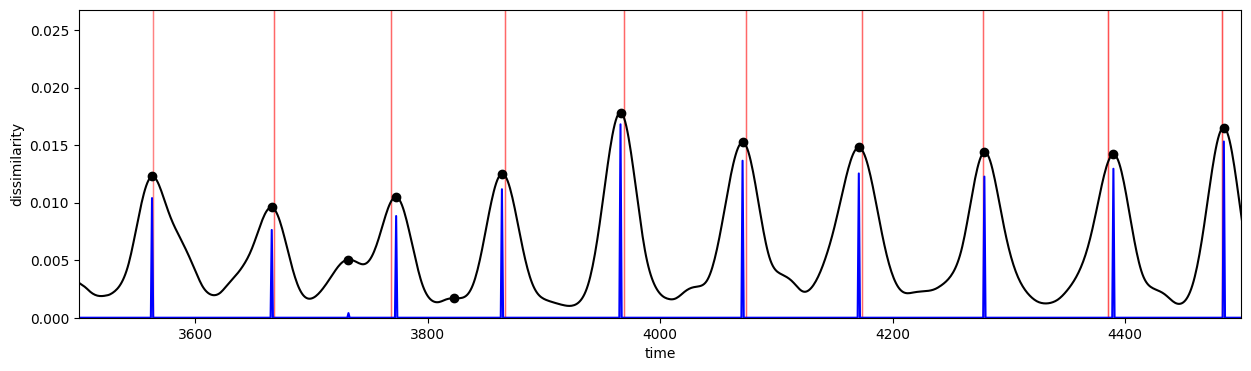

[0.7338477252084621, 0.9197199969056431, 0.9197199969056431]


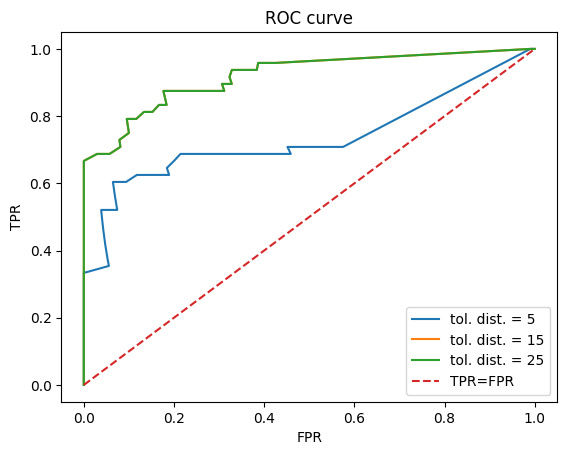

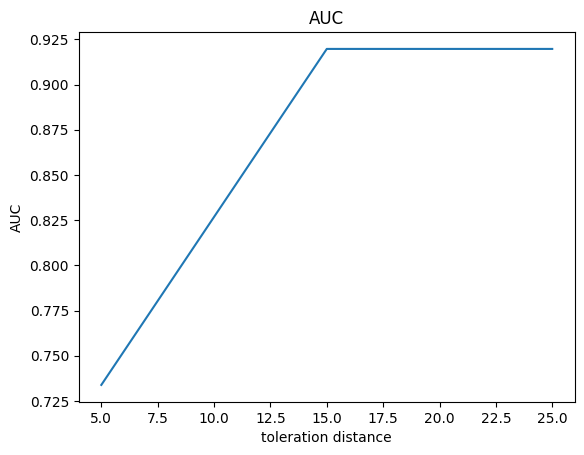

Model: "model_108"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_73 (InputLayer)       [(None, 3, 20)]              0         []                            
                                                                                                  
 dense_144 (Dense)           (None, 3, 1)                 21        ['input_73[0][0]']            
                                                                                                  
 dense_145 (Dense)           (None, 3, 0)                 0         ['input_73[0][0]']            
                                                                                                  
 tf.concat_36 (TFOpLambda)   (None, 3, 1)                 0         ['dense_144[0][0]',           
                                                                     'dense_145[0][0]']   

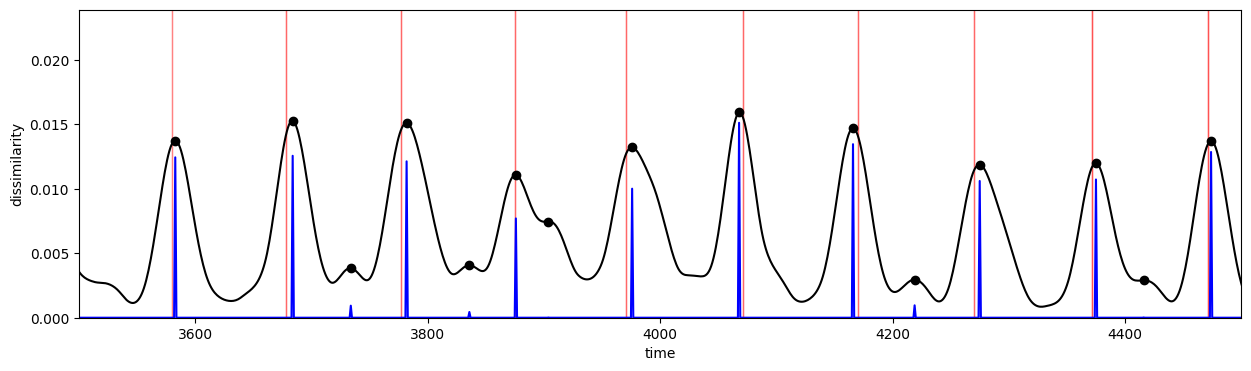

[0.5941961277177675, 0.9513794777756968, 0.9869841473868388]


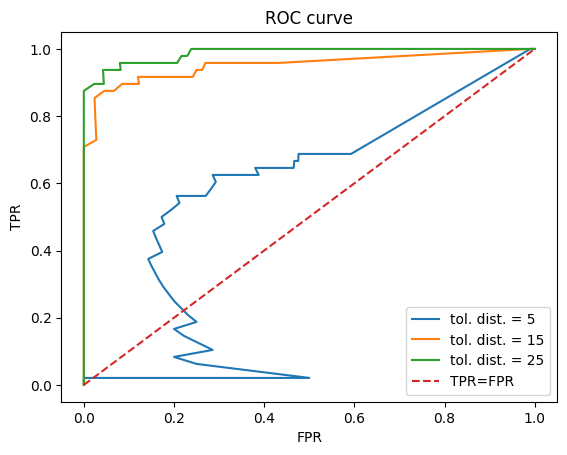

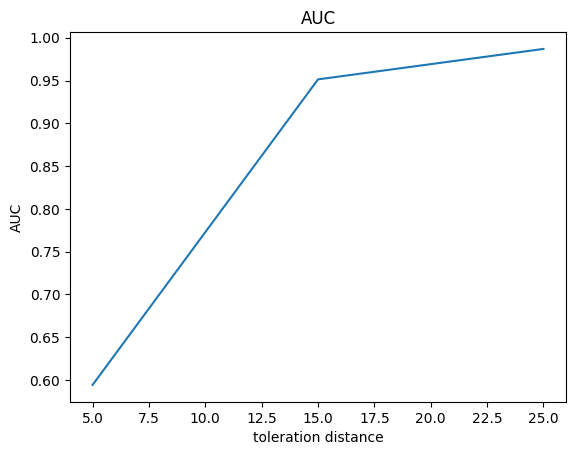

Model: "model_114"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_77 (InputLayer)       [(None, 3, 20)]              0         []                            
                                                                                                  
 dense_152 (Dense)           (None, 3, 1)                 21        ['input_77[0][0]']            
                                                                                                  
 dense_153 (Dense)           (None, 3, 0)                 0         ['input_77[0][0]']            
                                                                                                  
 tf.concat_38 (TFOpLambda)   (None, 3, 1)                 0         ['dense_152[0][0]',           
                                                                     'dense_153[0][0]']   

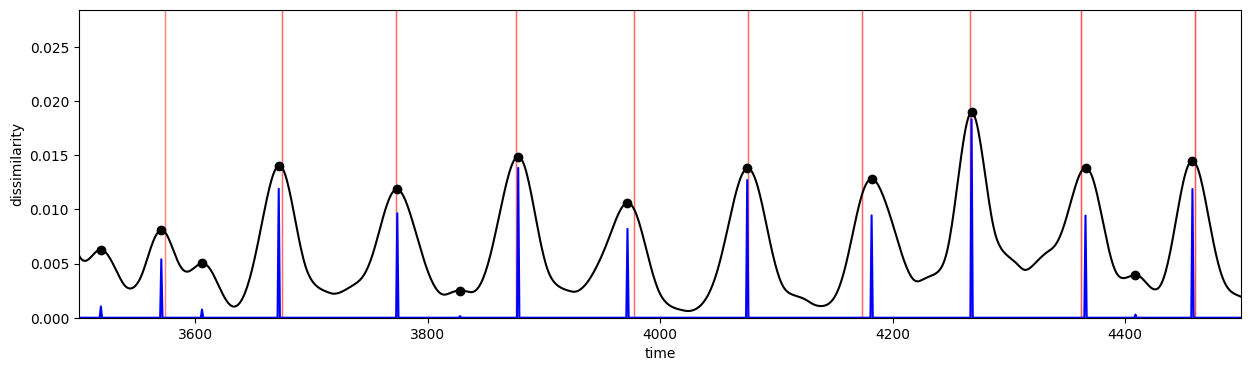

[0.564248270204754, 0.8938301613501491, 0.9538265659703707]


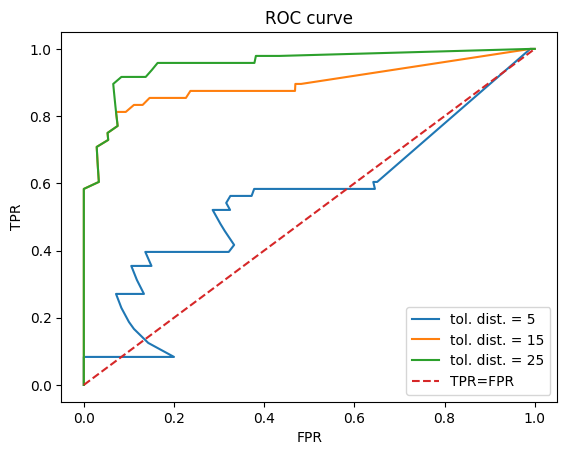

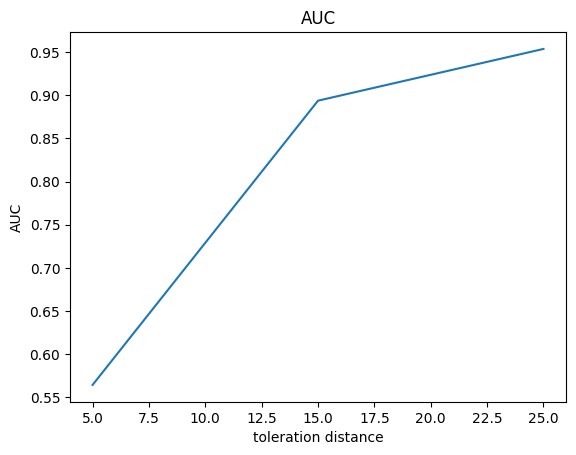

Model: "model_120"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_81 (InputLayer)       [(None, 3, 20)]              0         []                            
                                                                                                  
 dense_160 (Dense)           (None, 3, 1)                 21        ['input_81[0][0]']            
                                                                                                  
 dense_161 (Dense)           (None, 3, 0)                 0         ['input_81[0][0]']            
                                                                                                  
 tf.concat_40 (TFOpLambda)   (None, 3, 1)                 0         ['dense_160[0][0]',           
                                                                     'dense_161[0][0]']   

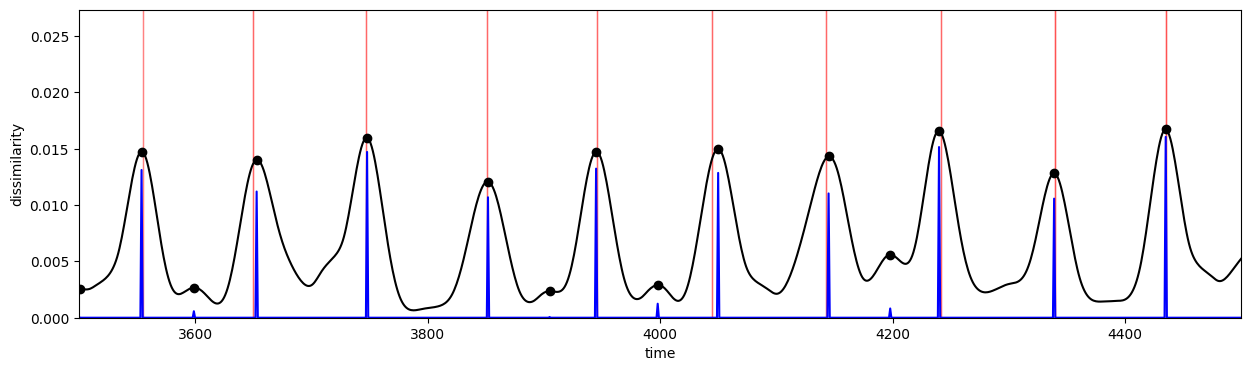

[0.6916406924294056, 0.895187881534868, 0.9209629433976139]


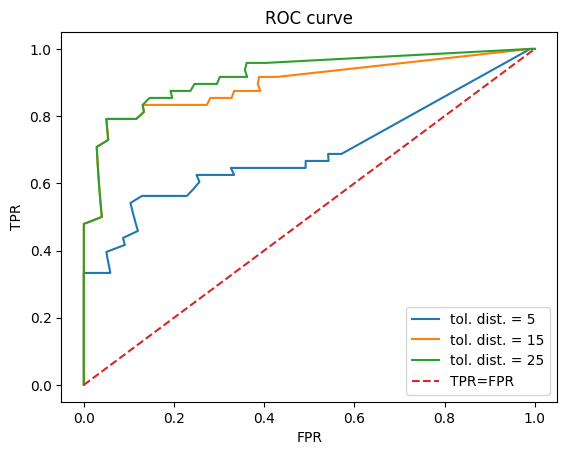

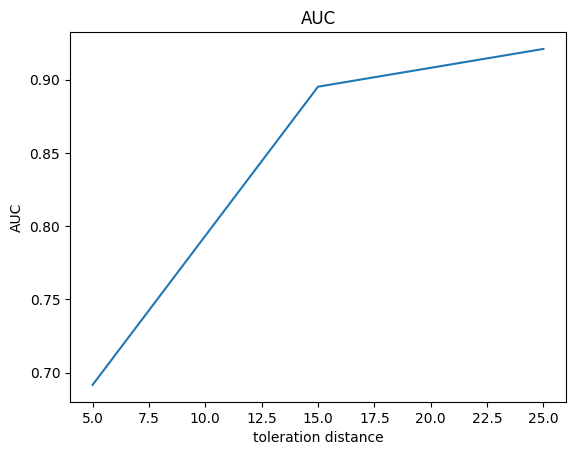

Model: "model_126"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_85 (InputLayer)       [(None, 3, 20)]              0         []                            
                                                                                                  
 dense_168 (Dense)           (None, 3, 1)                 21        ['input_85[0][0]']            
                                                                                                  
 dense_169 (Dense)           (None, 3, 0)                 0         ['input_85[0][0]']            
                                                                                                  
 tf.concat_42 (TFOpLambda)   (None, 3, 1)                 0         ['dense_168[0][0]',           
                                                                     'dense_169[0][0]']   

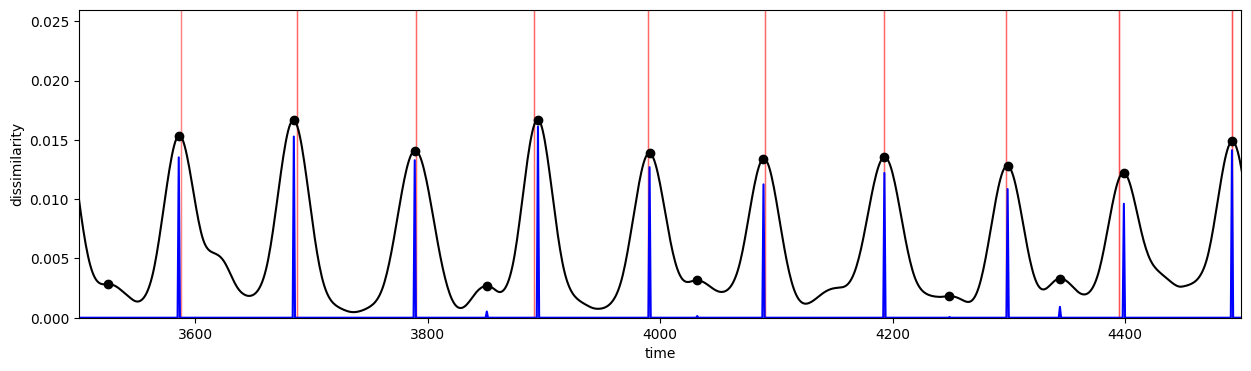

[0.7163564270060638, 0.8598407932617277, 0.9380809673574474]


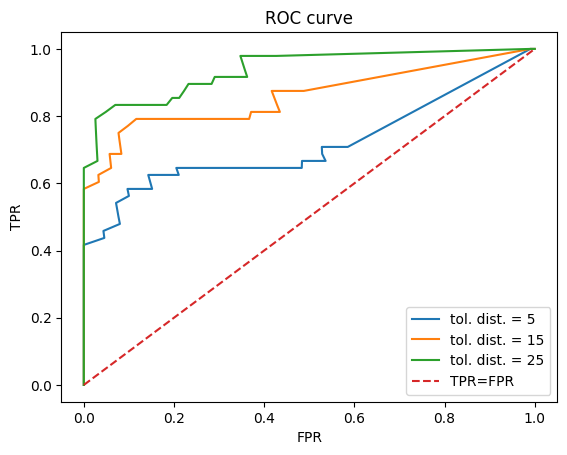

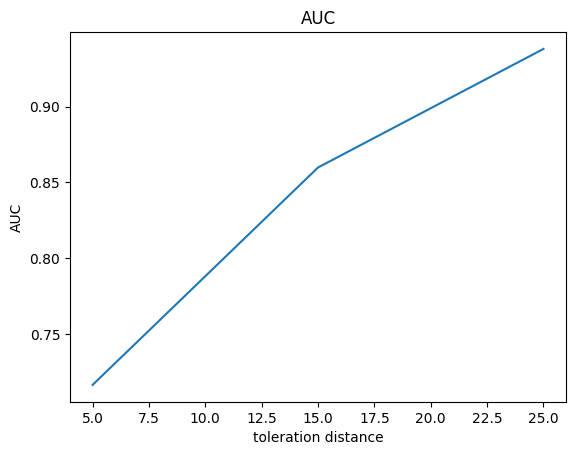

In [18]:
aucs = []
for i in range(10):
    timeseries, windows_TD, parameters = simulate.generate_jumpingmean(window_size)
    windows_FD = utils.calc_fft(windows_TD, nfft, norm_mode)
    shared_features_TD = TIRE.train_AE(windows_TD, intermediate_dim_TD, latent_dim_TD, nr_shared_TD, nr_ae_TD, loss_weight_TD)
    shared_features_FD = TIRE.train_AE(windows_FD, intermediate_dim_FD, latent_dim_FD, nr_shared_FD, nr_ae_FD, loss_weight_FD)
    dissimilarities = TIRE.smoothened_dissimilarity_measures(shared_features_TD, shared_features_FD, domain, window_size)
    change_point_scores = TIRE.change_point_score(dissimilarities, window_size)
    utils.plot_cp(dissimilarities, parameters, window_size, time_start, time_stop, plot_prominences)

    tol_distances = [5,15,25]
    auc = utils.get_auc(dissimilarities,tol_distances, parameters, window_size)
    aucs.append(auc)

In [19]:
import pandas as pd

In [20]:
s = pd.DataFrame(aucs)

In [21]:
s.mean()

0    0.663304
1    0.897841
2    0.945411
dtype: float64